# 問題1 ジニ不純度を求める関数

In [6]:
'''
Attribure:
ndarray型 p : それぞれのクラスの所属割合
'''
import numpy as np

def gini(p):
    return 1 - np.sum(p**2)

In [9]:
p = np.array([0.5,0.5])
print(gini(p))
p2 = np.array([0,1])
print(gini(p2))

0.5
0


In [14]:
'''
Attribure:
ndarray型 samples: それぞれのクラスのサンプル数
'''

def gini_from_num(samples):
    all_sample = np.sum(samples)
    sample_prob = samples / all_sample
    
    return 1 - np.sum(sample_prob ** 2)

In [13]:
sample1 = np.array([15,15])
print(gini_from_num(sample1))
sample2 = np.array([15,15,15])
print(gini_from_num(sample2))
sample3 = np.array([18,12])
print(gini_from_num(sample3))

0.5
0.6666666666666667
0.48


# 問題2 情報利得を求める関数

In [133]:

'''
Attribure:

left_samples ndarray型: 左側のノードの各クラスのサンプル数
right_samples ndarray型: 右側のノードの各クラスのサンプル数

'''

def ig(left_samples, right_samples):
    
    left_all = np.sum(left_samples)
    right_all = np.sum(right_samples)
    all_samples = left_all + right_all
    print(all_samples)
    parent_samples = left_samples + right_samples
    print(parent_samples)
    
    left = left_all * gini_from_num(left_samples) / all_samples
    right = right_all * gini_from_num(right_samples) /all_samples
    ig = gini_from_num(parent_samples) - left - right
    return ig
    

In [134]:
left_samples = np.array([10,30])
right_samples = np.array([20,5])
ig(left_samples, right_samples)

65
[30 35]


0.14319526627218937

# 問題3 深さ1の決定木分類器クラスの作成

In [2]:
from scipy.stats import mode

class ScratchDecisionTreeClassifier:
    def __init__(self,max_depth=1,max_features=2):
        self.max_depth = max_depth
        self.max_features = max_features
        self.fit_values = \
        np.zeros((max_depth, 2 ** max_depth))
        self.dims = np.zeros((max_depth, 2 ** (max_depth - 1))).astype(
        np.uint32)
        self.igs = np.zeros((max_depth, 2 ** (max_depth - 1)))
        
        self.label_decision_list = []
        
    
        
    def fit(self, X,y):
        for n in range(self.max_depth):
            best_ig, fit_dim, best_fit = self.calc_best_fit(X,y)
            self.igs[n] = best_ig
            self.dims[n] = fit_dim
            self.fit_values[n] = best_fit
            
            
        
        #pred_list = []
        #pred1 = np.where(X[:,self.dims[0,0]] > self.fit_values[0,0], 0, 1)
        #acc1 = self.accuracy(y,pred1)
        #pred_list.append(acc1)
        #print(pred1,'pred1')
        #print(acc1,'acc1')
        #pred2 = np.where(X[:,self.dims[0,0]] > self.fit_values[0,0], 1, 0)
        #acc2 = self.accuracy(y,pred2)
        #pred_list.append(acc2)
        #print(pred2,'pred2')
        #print(acc2,'acc2')
        
        #self.pred_list.append(np.sort(pred_list)[-1])
            
            
        
    def calc_best_fit(self,X,y):
        N,D = X.shape
        self.best_fits = np.zeros((N-1,D))
        C = np.unique(y)
        print(C)
        best_ig = 0
        best_fit = 0
        
        #閾値の算出
        for d in range(D):
            X_d = X[:,d]
            y_index = np.argsort(X_d)
            X_d = np.sort(X_d)
            y_d = y[y_index]
            for n in range(N-1):
                fit_value = X_d[n]
                
                #分割
                left_data_mask = X_d <= fit_value
                right_data_mask = X_d > fit_value
                
                left_ydata = y_d[left_data_mask]
                right_ydata = y_d[right_data_mask]
                
                left_samples = np.zeros(len(C))
                right_samples = np.zeros(len(C))
                
                #クラスごとのサンプル数を計算
                for idx, c in enumerate(C):
                    
                    left_samples[idx] = np.sum(left_ydata == c)
                    right_samples[idx] = np.sum(right_ydata == c)
                    
                this_ig = self.ig(left_samples, right_samples)
                self.best_fits[n,d] = this_ig
                
                if best_ig < this_ig:
                    best_ig = this_ig
                    best_fit = fit_value
                    fit_dim = d
        
        print(best_ig,'best_ig')
        print(fit_dim,'fit_dim')
        print(best_fit, 'best_fit')
        above_mask = X[:,fit_dim] > best_fit
        below_mask = X[:,fit_dim] <= best_fit
        above_label = mode(y[above_mask])[0][0]
        below_label = mode(y[below_mask])[0][0]
        
        
        #above_label,below_label = self.decision_class(best_fit,
          #                                            fit_dim, X, y)
        self.label_decision_list.append(np.array([above_label,
                                                  below_label]))
        
        return best_ig, fit_dim, best_fit

                

            
        
        
        
        #閾値をノードを分けるので最適の閾値を算出する
        
    def ig(self, left_samples, right_samples):
    
        left_all = np.sum(left_samples)
        right_all = np.sum(right_samples)
        all_samples = left_all + right_all
        parent_samples = left_samples + right_samples

        left = left_all * self.gini_from_num(left_samples) / all_samples
        right = right_all * self.gini_from_num(right_samples) /all_samples
        ig = self.gini_from_num(parent_samples) - left - right
        return ig


    def gini_from_num(self, samples):
        all_sample = np.sum(samples)
        sample_prob = samples / all_sample

        return 1 - np.sum(sample_prob ** 2)

    def predict(self,X):
        print(self.dims[0])
        print(X[:,self.dims[0]])
        print(self.fit_values[0])
        #print(self.pred_list[0],'where')
        return np.where(self.fit_values[0,0] < X[:,self.dims[0,0]],
                       self.label_decision_list[0][0],
                       self.label_decision_list[0][1])
        
        
    def accuracy(self,y,y_pred):
        score = np.sum(y == y_pred)/len(y)
        return score
        
    def decision_class(self, fit_value,dim,X,y):
        #2分割された領域にそれぞれ存在するXに対応するyを取得し、
        #そのyによって多数決を実行する
        print(fit_value,'fit_value')
        c_region1_mask = X[:,dim] > fit_value
        c_region1 = y[c_region1_mask]
        c_region2_mask = X[:,dim] <= fit_value
        c_region2 = y[c_region2_mask]
        
        c_region1_labels,c_region1_count = \
        np.unique(c_region1, return_counts=True)
        print(c_region1_labels,'labels')
        print(c_region1_count,'c_region1_count')
        frequent_idx1 = np.argmax(c_region1_count)
        c_region1_label = c_region1_labels[frequent_idx1]
        
        c_region2_labels,c_region2_count = \
        np.unique(c_region2, return_counts=True)
        print(c_region2_count,'c_region2_count')
        frequent_idx2 = np.argmax(c_region2_count)
        c_region2_label = c_region2_labels[frequent_idx2]
        
        label_above = c_region1_label
        label_below = c_region2_label
        print(label_above,'above')
        print(label_below,'below')
        #閾値よりと大きいと〇〇ラベル、閾値より小さいと〇〇ラベル
        #というのが求まった。
        return label_above, label_below
        
    
        

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
iris_data = load_iris()
data = iris_data['data']
y_all = iris_data['target']
y_mask = y_all != 2
y = y_all[y_mask]
print(type(data))
X = data[y_mask,0:2]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=0)

<class 'numpy.ndarray'>


In [3]:
sdt = ScratchDecisionTreeClassifier()
sdt.fit(X_train,y_train)

[0 1]
0.2697116809116808 best_ig
0 fit_dim
5.4 best_fit


# 問題6 指標値の算出

In [6]:
print('test accuracy: {:.3f}%'.format(100 * sdt.accuracy(sdt.predict(X_test),y_test)))

[0]
[[5.8]
 [7. ]
 [5.1]
 [5.1]
 [4.6]
 [5.7]
 [5.1]
 [5.5]
 [4.6]
 [6.7]
 [6.5]
 [4.6]
 [5. ]
 [6.4]
 [5.6]
 [4.9]
 [5.5]
 [5.1]
 [5.5]
 [4.4]
 [5.1]
 [4.8]
 [5.5]
 [5.7]
 [6.7]]
[5.4 5.4]
test accuracy: 96.000%


情報利得の計算の意味

まず、右左の不純度をだす。
それらの不純度の相加平均と、親ノードの不純度の差を求めている。
情報利得が大きい＝差が大きい＝不純度がよく下がった。つまり、不純度の下がり幅が情報利得という意味


バリアンスとバイアス
バリアンスとは分散のことだが、なんの分散のことかというと真
の母集団のthetaと推定値のthetaのこと

考えること
→
・重要度の判定はどうやっているのか？
・バイアスとバリアンスの数式の深い理解、それらがどのように
テストデータ訓練データの過学習に当てはめられ流のか

サンプル数を分割できる値を閾値とする
つまり、N-1回分割し、情報利得の最大のところを閾値として設定する

また、1ノードにつき、1特徴量で分割する

重要性は、ジニ不純度の小ささ＋葉の数
これを最小化するように葉を剪定する

In [28]:
D = 6
random_index = np.random.permutation(D)
random_index_selected = random_index[:3]

In [29]:
random_index_selected

array([3, 1, 5])

In [41]:
sample = np.array([1,4,3,6,8,3])
sample_sort = np.sort(sample)[::-1]

In [42]:
sample_sort

array([8, 6, 4, 3, 3, 1])

In [46]:
print(np.sum(sample_sort == 3))

2


In [87]:
np.unique(sample_sort, return_counts=True)

(array([1, 3, 4, 6, 8]), array([1, 2, 1, 1, 1]))

[0 1]
0.2697116809116808 best_ig
0 fit_dim
5.4 best_fit
[0]
[[3.3 ]
 [3.32]
 [3.34]
 ...
 [7.86]
 [7.88]
 [7.9 ]]
[5.4 5.4]
(50820,) Zの形
0 cl
0 idx
1 cl
1 idx
[0]
[[6.1]
 [5. ]
 [5.9]
 [5.2]
 [6.6]
 [6.3]
 [5.2]
 [5.7]
 [5.4]
 [5. ]
 [5. ]
 [4.8]
 [4.4]
 [5.4]
 [6.2]
 [4.7]
 [6.9]
 [5.1]
 [5.2]
 [5.4]
 [5. ]
 [4.3]
 [4.9]
 [6. ]
 [5. ]
 [5. ]
 [6.1]
 [5.8]
 [5.7]
 [5.5]
 [5.9]
 [5.7]
 [5.5]
 [5.4]
 [5.6]
 [5. ]
 [5.3]
 [6. ]
 [5.1]
 [5.8]
 [6.3]
 [4.5]
 [5.6]
 [5.4]
 [6.6]
 [6.2]
 [4.8]
 [6.1]
 [4.9]
 [5.1]
 [5.1]
 [4.4]
 [6.1]
 [6.3]
 [5.7]
 [5.6]
 [5. ]
 [4.9]
 [6.7]
 [6.8]
 [5.4]
 [6.4]
 [4.8]
 [5.8]
 [5.2]
 [5.5]
 [6. ]
 [5.7]
 [6. ]
 [4.6]
 [4.9]
 [5. ]
 [4.8]
 [5.6]
 [4.7]]
[5.4 5.4]
0.8666666666666667



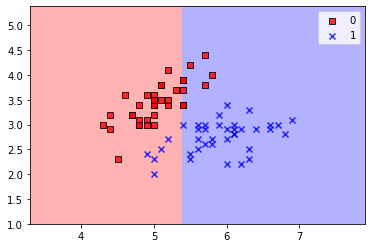

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

sdt = ScratchDecisionTreeClassifier()
sdt.fit(X_train,y_train)
plot_decision_regions(X_train,y_train,sdt)
print(sdt.accuracy(y_train,sdt.predict(X_train)))
print()
#sdt.accuracy(y_trai



In [168]:
print(sdt.best_fits)
print(np.max(sdt.best_fits))

[[0.00693814 0.00657778]
 [0.02139259 0.02028148]
 [0.02139259 0.02028148]
 [0.0289252  0.02528926]
 [0.03667302 0.02528926]
 [0.05285229 0.02528926]
 [0.05285229 0.02528926]
 [0.08824444 0.03984377]
 [0.08824444 0.03984377]
 [0.08824444 0.0640381 ]
 [0.08824444 0.0640381 ]
 [0.0968     0.0640381 ]
 [0.0968     0.08170658]
 [0.0968     0.08170658]
 [0.0968     0.12104172]
 [0.13710065 0.12104172]
 [0.13710065 0.12104172]
 [0.13710065 0.12104172]
 [0.13710065 0.15451429]
 [0.13710065 0.15451429]
 [0.13710065 0.15451429]
 [0.13710065 0.22706753]
 [0.13710065 0.22706753]
 [0.13710065 0.22706753]
 [0.1577024  0.22706753]
 [0.1577024  0.22706753]
 [0.1577024  0.22706753]
 [0.1577024  0.22706753]
 [0.18275995 0.22706753]
 [0.18275995 0.25099672]
 [0.18275995 0.25099672]
 [0.18275995 0.25099672]
 [0.19820837 0.25099672]
 [0.26971168 0.25099672]
 [0.26971168 0.25099672]
 [0.26971168 0.25099672]
 [0.26971168 0.25099672]
 [0.26971168 0.25099672]
 [0.26971168 0.25099672]
 [0.25448543 0.25099672]


In [442]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(Z,'Z')
    print(Z.shape,'Zの形')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        print(cl,'cl')
        print(idx,'idx')
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.legend()

In [443]:
for i in range(1):
    print(i)

0


# 問題4 深さ2の決定木分類器クラスの作成

In [444]:
左が閾値より小さい
右が閾値より大きい


NameError: name '左が閾値より小さい' is not defined

In [144]:
test_data = np.array([2,3,4,4,1])
test_mode = mode(test_data)
test_mode[0][0]

4

In [1128]:
from scipy.stats import mode

'''
input:
threshold_list
N=max_depth
D=3

D=1:閾値
D=2:次元
D=3:above or below 0ならbelowで左ノード、1ならaboveで右ノード


return:
thresholdinfo_left
thresholdinfo_right

また完全に分離できた場合はストップフラグをreturnするような工夫が必要
'''

class Tree:
    def __init__(self,last_flg):
        self.threshold_info = None
        self.output_threshold_info =[]
        self.last_flg = last_flg
        

        
    def forward(self, X, y,threshold_info):
        print(threshold_info,'threshold_info')
        self.threshold_info = threshold_info
        
        if isinstance(self.threshold_info, np.ndarray):
            self.threshold_list = self.threshold_info[:,0]
            self.dims_list = self.threshold_info[:,1]
            self.above_or_low_list = self.threshold_info[:,2]
        
        #Xの加工
        X_selected = X
        y_selected = y
        if isinstance(self.threshold_info, np.ndarray) :
            print('treeに移動。self.threshold_info確認',self.threshold_info)
            for threshold, dim, above_or_low in zip(self.threshold_list,
                                                  self.dims_list,self.above_or_low_list):
                dim = int(dim)
                print('通ってる')
                if above_or_low == 0:
                    print('dim', dim)
                    print('threshold', threshold)
                    print('above_or_low=0を通過')
                    
                    X_selected_mask = X_selected[:,dim] <= threshold
                    print('above_or_lowが0のとき閾値より小さい')

                elif above_or_low == 1:
                    X_selected_mask = X_selected[:,dim] > threshold
                    print('above_or_low=1を通過')

                X_selected = X_selected[X_selected_mask]
                #print(X_selected[:,0].max(),'0次元方向の最大値')
                #print(X_selected[:,0].min(),'0次元方向の最小値')
                #print(X_selected[:,1].max(),'1次元方向の最大値')
                #print(X_selected[:,1].min(),'1次元方向の最小値')
                y_selected = y_selected[X_selected_mask]
                #前回までの決定木の分離の反映が完了
                
            
        C = np.unique(y)
        print(C)
        best_ig = 0
        best_fit = 0
        N,D = X_selected.shape
        print(N,'サンプル数')
        self.best_fits = np.zeros((N-1,D))
        #閾値の算出
        print('D',D)
        for d in range(D):
            print(str(d) + '次元の探索開始------------------')
            print()
            print()
            print()
            X_d = X_selected[:,d]
            #print('X_dの最大値', X_d.max())
            #print('X_dの最小値', X_d.min())
            y_index = np.argsort(X_d)
            X_d = X_d[y_index]
            y_d = y_selected[y_index]
            #print(y_d.shape,'y_dの形')
            for n in range(N-1):
                fit_value = X_d[n]
                
                #分割
                
                left_data_mask = X_d <= fit_value
                right_data_mask = X_d > fit_value
                
                left_ydata = y_d[left_data_mask]
                right_ydata = y_d[right_data_mask]
                #print('閾値より下側のy',left_ydata)
                #print('閾値より上側のy',right_ydata)
                
                left_samples = np.zeros(len(C))
                right_samples = np.zeros(len(C))
                
                #クラスごとのサンプル数を計算
                for idx, c in enumerate(C):
                    
                    left_samples[idx] = np.sum(left_ydata == c)
                    right_samples[idx] = np.sum(right_ydata == c)
                    
                this_ig = self.ig(left_samples, right_samples)
                #print('全ての情報利得を表示',this_ig)
                #print('全ての閾値', fit_value)
                #print('全ての閾値より下のクラスごとサンプル',left_samples)
                #print('全ての閾値より上のクラスごとサンプル',right_samples)
                self.best_fits[n,d] = this_ig
                
                if best_ig < this_ig:
                    #print('比較通ってる？')
                    #print('閾値より小さいデータ',left_ydata)
                    #print('閾値より大きいデータ',right_ydata)
                    print('left_samples',left_samples)
                    print('right_samples',right_samples)
                    
                    best_ig = this_ig
                    best_fit = fit_value
                    print('現時点でのbestfit',best_fit)
                    print(str(d) + '次元')
                    print('情報利得：',best_ig)
                    fit_dim = d
                    best_left_samples = left_samples
                    best_right_samples = right_samples
        
        print(best_ig,'best_ig')
        print(fit_dim,'fit_dim')
        print(best_fit, 'best_fit')
        
        left_node_mask = X_selected[:,fit_dim] <= best_fit
        right_node_mask = X_selected[:,fit_dim] > best_fit
        print('閾値が決定',best_fit, fit_dim)
        print('閾値より小さいときのXの情報')
#         print('0次元最大', X_selected[left_node_mask,0].max())
#         print('0次元最小', X_selected[left_node_mask,0].min())
#         print('1次元最大', X_selected[left_node_mask,1].max())
#         print('1次元最小', X_selected[left_node_mask,1].min())
        
#         print('閾値より大きいときのXの情報')
#         print('0次元最大', X_selected[right_node_mask,0].max())
#         print('0次元最小', X_selected[right_node_mask,0].min())
#         print('1次元最大', X_selected[right_node_mask,1].max())
#         print('1次元最小', X_selected[right_node_mask,1].min())
                
        print('それぞれユニークデータのクラスごとカウントの確認')
        print(np.unique(y_selected[left_node_mask],
                        return_counts=True),'左ノードのラベルのカウンド,閾値より小さい')
        print(np.unique(y_selected[right_node_mask],
                        return_counts=True),'右ノードのラベルのカウンド,閾値より大きい')
        left_node_label = mode(y_selected[left_node_mask])[0][0]
        right_node_label = mode(y_selected[right_node_mask])[0][0]
        self.node_label_list = [left_node_label, right_node_label]
        full_sep_flg_left=False
        full_sep_flg_right=False
        
#         left_count_info = np.unique(y_selected[left_node_mask],
#                         return_counts=True)
#         right_count_info = np.unique(y_selected[right_node_mask],
#                         return_counts=True)
        
 #       print('left_count_infoの情報',left_count_info)
        if min(best_left_samples) == 0 or self.last_flg == True:
            print('last_flgがtrueまたは完全に分離されたため、full_sep_flgをTrueにします。')
            full_sep_flg_left = True
        if min(best_right_samples) == 0 or self.last_flg == True:
            print('last_flgがtrueまたは完全に分離されたため、full_sep_flgをTrueにします。')
            full_sep_flg_right = True
            
            
        #親を２つに分離した情報を長さ2の配列の中に格納。左がlow=0,右がhigh=1
        return_left_node = np.array([best_fit, fit_dim, 0, full_sep_flg_left]).reshape(1,-1)
        return_right_node = np.array([best_fit, fit_dim, 1, full_sep_flg_right]).reshape(1,-1)
        
        if isinstance(self.threshold_info, np.ndarray):
            
            thresholdinfo_left = np.concatenate([self.threshold_info,
                                               return_left_node],axis=0)
            thresholdinfo_right = np.concatenate([self.threshold_info,
                                               return_right_node],axis=0)
            
            
        else:
            
            thresholdinfo_left = return_left_node
            thresholdinfo_right = return_right_node
        
            
            
        
        self.output_threshold_info.append(thresholdinfo_left)
        self.output_threshold_info.append(thresholdinfo_right)
        print('output_threshold_infoの左が閾値より小さい、右が閾値より大きい')
    
        
         
        #閾値をノードを分けるので最適の閾値を算出する
        
    def ig(self, left_samples, right_samples):
    
        left_all = np.sum(left_samples)
        right_all = np.sum(right_samples)
        all_samples = left_all + right_all
        #print(left_samples,'left_samples')
        #print(right_samples,'right_samples')
        parent_samples = left_samples + right_samples
        #print(parent_samples,'parent_samples')
        

        left = left_all * self.gini_from_num(left_samples) / all_samples
        right = right_all * self.gini_from_num(right_samples) /all_samples
        ig = self.gini_from_num(parent_samples) - left - right
        return ig


    def gini_from_num(self, samples):
        all_sample = np.sum(samples)
        sample_prob = samples / all_sample

        return 1 - np.sum(sample_prob ** 2)

    
        
    
        

In [1129]:
class Forest:
    
    def __init__(self, depth, last_flg):
        #例えば深さ3ならtreeを4つ生成
        self.depth = depth
        self.tree_num = 2 **(self.depth - 1)
        self.output_threshold_info = []
        self.trees = []
        self.node_label_list = []
        self.last_flg = last_flg

        for i in range(self.tree_num):
            tree = Tree(self.last_flg)
            self.trees.append(tree)
            print('tree' + str(i))
        
    def forward(self,X,y,threshold_info_list):
        
        print(str(self.depth)+'層目のforest実行開始********************************')
        count = 1
        for threshold_info, tree in zip(threshold_info_list, self.trees):
            print('====' + str(count) +'ノード目======')
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            print()
            
            
            
            print(threshold_info,'treeが受け取る条件')
            if isinstance(threshold_info, np.ndarray):
                if threshold_info[-1,3]==1:
                    print('情報' + str(threshold_info) + 'のtree処理をスキップします。')
                    continue
            tree.forward(X,y,threshold_info)
            self.output_threshold_info += tree.output_threshold_info
            self.node_label_list += tree.node_label_list
            print(self.node_label_list,'ラベルリスト追加履歴')
            count += 1
            
            #例えばdepthが2のforestの場合、二つのinfo_listを受け取り、
            #4つのthreshold_info_listを返す。
            
            

In [1393]:
class Woods:
    def __init__(self,max_depth=5,max_features=2):
        self.max_depth = max_depth
        self.max_features = max_features
        self.forests = []
        self.threshold_info_list = [[0]]
        self.node_labels = [[0]]
        
        last_flg = False
        for i in range(self.max_depth):
            if i+1 == self.max_depth:
                print('最後のforestを実行するためlast_flgをtrueにします。')
                last_flg = True
            forest = Forest(i+1,last_flg)
            self.forests.append(forest)
    
    def fit(self,X,y):
        
        for idx, forest in enumerate(self.forests):
            
            forest.forward(X,y,self.threshold_info_list[idx])
            self.threshold_info_list.append(forest.output_threshold_info)
            
            self.node_labels.append(forest.node_label_list)
              
    
    
    
    
    
    
    def predict(self,X):
        y_size = X.shape[0]
        y_pred = np.zeros(y_size)
        
        
        
        
        
        
        
        print('最終ノードの情報の抽出')
        
        print(self.threshold_info_list[-1], '最後のノードの情報')
        print(self.node_labels, 'ノードの情報のラベル')
        color_list = ['red','blue','green','yellow']
        count = 1
        
        for threshhold_infos_forest, node_labels_forest in zip(
            self.threshold_info_list, self.node_labels):
 
            print('============第' + str(count) + '階層の条件抽出開始===============')
            print(threshhold_infos_forest, '1階層分の情報＿条件')
            print(node_labels_forest, '1階層分の情報_ラベル')
            for threshhold_infos_tree, node_label_tree in zip(threshhold_infos_forest, node_labels_forest):
                print(threshhold_infos_tree, '木単位の情報')
                print(node_label_tree,'木単位のラベル情報')
                print('threshhold_infos_treeのtype:',type(threshhold_infos_tree))
                
                if isinstance(threshhold_infos_tree, np.ndarray):
                    print(threshhold_infos_tree[-1,3], 'full_sepフラグをのぞいてみる')
                    if threshhold_infos_tree[-1,3] == 1:
                        print('条件抽出対象のノードであるため抽出を実行します')
                        condisions = []
                        for threshhold_info in threshhold_infos_tree:
                            
                        
                        
                    
                        

                            print()
                            print('1ノードに対する条件',threshhold_info)
                            #条件を適用しインデックスを抽出
                            threshold = threshhold_info[0]
                            dim = int(threshhold_info[1])
                            high_or_low = threshhold_info[2]



                            if high_or_low == 0:
                                print('high通っている')
                                condisions.append(X[:,dim] <= threshold)
                            else:
                                print('low通っている')
                                condisions.append(X[:,dim] > threshold)


                        print('1ノードに対する条件の集合',condisions)
                        print(len(condisions), 'コンディションズの長さ')
                        result_index = self.apply_condtions(condisions, X.shape[0])
                        print(result_index,'result_index')
                        print(np.sum(result_index.astype(np.uint64)), 'サンプル数')
                        #print(last_node_label,'last_node_label')
                        y_pred[result_index] = node_label_tree
            
        
            #plt.scatter(X[result_index,0], X[result_index,1],
              #       color= color_list[count])
            count += 1
            
        print(y_pred,'y_pred')
        
        return y_pred
                
    '''
    複数の条件をarrayに反映し、条件に当てはまるindex
    を抽出する
     
    '''           
    def apply_condtions(self, conditions,array_num):

        testdatas = np.array([1,2,3,4,5,5,6,6,7,7,8])
        zyoukens = [testdatas < 5, testdatas >2]
        conditions_masks = np.zeros((array_num, len(conditions)))
        for i in range(len(conditions)):
            conditions_masks[:,i]= conditions[i]

        print(conditions_masks)
        result_mask = np.sum(conditions_masks,axis=1) == \
        len(conditions)
        print(result_mask,'result_mask')
        #print(array[result_mask])
        return result_mask
    
    
    def accuracy(self,X, y):
        y_pred = self.predict(X)
        return (np.sum(y_pred == y)/len(y)) * 100
        
                
            
            
                
                
  
        
            
            

In [1394]:
wd.node_labels

[[0], [0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0], []]

In [1395]:
wd.threshold_info_list

[[0],
 [array([[5.4, 0. , 0. , 0. ]]), array([[5.4, 0. , 1. , 0. ]])],
 [array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ]]), array([[5.4, 0. , 1. , 0. ],
         [3.4, 1. , 0. , 1. ]]), array([[5.4, 0. , 1. , 0. ],
         [3.4, 1. , 1. , 1. ]])],
 [array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ],
         [4.5, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ],
         [4.5, 0. , 1. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 1. , 0. ]])],
 [array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 1. , 0. ],
         [3. , 1. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 1. , 0. ],
         [3. , 1. , 1. , 1. ]])],
 []]

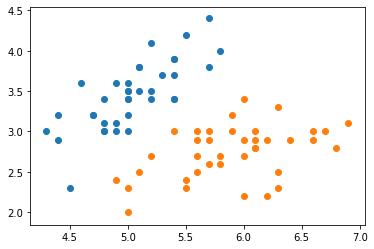

In [1396]:
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1])
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1])

In [1418]:
wd = Woods(max_depth=4)
wd.fit(X_train,y_train)

tree0
tree0
tree1
tree0
tree1
tree2
tree3
最後のforestを実行するためlast_flgをtrueにします。
tree0
tree1
tree2
tree3
tree4
tree5
tree6
tree7
1層目のforest実行開始********************************
====1ノード目======












0 treeが受け取る条件
0 threshold_info
[0 1]
75 サンプル数
D 2
0次元の探索開始------------------



left_samples [1. 0.]
right_samples [36. 38.]
現時点でのbestfit 4.3
0次元
情報利得： 0.006938138138137984
left_samples [3. 0.]
right_samples [34. 38.]
現時点でのbestfit 4.4
0次元
情報利得： 0.02139259259259252
left_samples [4. 0.]
right_samples [33. 38.]
現時点でのbestfit 4.5
0次元
情報利得： 0.02892519561815321
left_samples [5. 0.]
right_samples [32. 38.]
現時点でのbestfit 4.6
0次元
情報利得： 0.03667301587301569
left_samples [7. 0.]
right_samples [30. 38.]
現時点でのbestfit 4.7
0次元
情報利得： 0.05285228758169919
left_samples [11.  0.]
right_samples [26. 38.]
現時点でのbestfit 4.8
0次元
情報利得： 0.08824444444444429
left_samples [14.  1.]
right_samples [23. 37.]
現時点でのbestfit 4.9
0次元
情報利得： 0.09679999999999994
left_samples [21.  3.]
right_samples [16. 35.]
現時点でのbestfit 5.0
0次元
情報利

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:225: RuntimeWarning: invalid value encountered in true_divide


In [1419]:
print('正解率は{}%です。'.format(str(wd.accuracy(X_train,y_train))))

最終ノードの情報の抽出
[array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 1. , 0. ],
       [3. , 1. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 1. , 0. ],
       [3. , 1. , 1. , 1. ]])] 最後のノードの情報
[[0], [0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0]] ノードの情報のラベル
============第1階層の条件抽出開始===============
[0] 1階層分の情報＿条件
[0] 1階層分の情報_ラベル
0 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'int'>
============第2階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ]]), array([[5.4, 0. , 1. , 0. ]])] 1階層分の情報＿条件
[0, 1] 1階層分の情報_ラベル
[[5.4 0.  0.  0. ]] 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
[[5.4 0.  1.  0. ]] 木単位の情報
1 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
============第3階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 0. , 0. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ]]), array([[5.4, 0. , 1. , 0. ]

In [1412]:
wd.threshold_info_list

[[0],
 [array([[5.4, 0. , 0. , 0. ]]), array([[5.4, 0. , 1. , 0. ]])],
 [array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ]]), array([[5.4, 0. , 1. , 0. ],
         [3.4, 1. , 0. , 1. ]]), array([[5.4, 0. , 1. , 0. ],
         [3.4, 1. , 1. , 1. ]])],
 [array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ],
         [4.5, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 0. , 0. ],
         [4.5, 0. , 1. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
         [2.7, 1. , 1. , 0. ],
         [5.3, 0. , 1. , 1. ]])]]

In [1413]:
#上記エラー
#y_selectedとyも絞る必要があった
e =[0]
c = [0]
for i,j in zip(e,c):
    print(i)
    print(j)

0
0


In [1414]:
wd.node_labels

[[0], [0, 1], [1, 0, 1, 0], [0, 1, 0, 0]]

In [1415]:
wd.predict(X)

最終ノードの情報の抽出
[array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 0. , 0. ],
       [4.5, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 0. , 0. ],
       [4.5, 0. , 1. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 1. , 1. ]])] 最後のノードの情報
[[0], [0, 1], [1, 0, 1, 0], [0, 1, 0, 0]] ノードの情報のラベル
============第1階層の条件抽出開始===============
[0] 1階層分の情報＿条件
[0] 1階層分の情報_ラベル
0 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'int'>
============第2階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ]]), array([[5.4, 0. , 1. , 0. ]])] 1階層分の情報＿条件
[0, 1] 1階層分の情報_ラベル
[[5.4 0.  0.  0. ]] 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
[[5.4 0.  1.  0. ]] 木単位の情報
1 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
============第3階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ],
      

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1416]:
testdatas = np.array([1,2,3,4,5,5,6,6,7,7,8])
zyoukens = [testdatas < 5, testdatas >2]
zyoken_masks = np.zeros((len(testdatas), len(zyoukens)))
for i in range(2):
    zyoken_masks[:,i]= zyoukens[i]
    #zyoukens = bool(zyoukens)
print(zyoken_masks)

result_mask = np.sum(zyoken_masks,axis=1) == len(zyoukens)
print(testdatas[result_mask])


[[1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[3 4]


# 問題7 決定領域の可視化

最終ノードの情報の抽出
[array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 1. , 0. ],
       [3. , 1. , 0. , 1. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ],
       [5.3, 0. , 1. , 0. ],
       [3. , 1. , 1. , 1. ]])] 最後のノードの情報
[[0], [0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0]] ノードの情報のラベル
============第1階層の条件抽出開始===============
[0] 1階層分の情報＿条件
[0] 1階層分の情報_ラベル
0 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'int'>
============第2階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ]]), array([[5.4, 0. , 1. , 0. ]])] 1階層分の情報＿条件
[0, 1] 1階層分の情報_ラベル
[[5.4 0.  0.  0. ]] 木単位の情報
0 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
[[5.4 0.  1.  0. ]] 木単位の情報
1 木単位のラベル情報
threshhold_infos_treeのtype: <class 'numpy.ndarray'>
0.0 full_sepフラグをのぞいてみる
============第3階層の条件抽出開始===============
[array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 0. , 0. ]]), array([[5.4, 0. , 0. , 0. ],
       [2.7, 1. , 1. , 0. ]]), array([[5.4, 0. , 1. , 0. ]

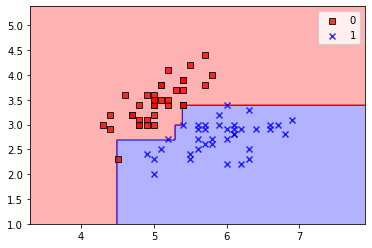

In [1420]:
plot_decision_regions(X_train,y_train,wd)

[array([[5.4, 0. , 0. ],
       [3.8, 1. , 0. ]]), array([[5.4, 0. , 0. ],
       [3.8, 1. , 1. ]]), array([[5.4, 0. , 1. ],
       [2.5, 1. , 0. ]]), array([[5.4, 0. , 1. ],
       [2.5, 1. , 1. ]])] 最後のノードの情報

[0, 0, 1, 1] 最後のノードの情報のラベル

In [1404]:
#結局明らかに適する線を引けていないことがわかる。

# 問題8 決定木の利用場面

In [ ]:
決定木はSVMなどとは違い、なぜこのような結果になったか説明しやすいため、
